![marek-studzinski-dInhWDrw38E-uns.jpg](attachment:732ede54-cd02-47f2-8d9c-ba30dc942ffc.jpg)

**The objective of this study is to analyze patients medical expenses by examining various influencing parameters, conducting a comprehensive exploratory data analysis (EDA) to understand cost dependencies, and developing a predictive model for accurate expense estimation.**

# **Variable Description**

**age** : Age of the patients

**sex** : Gender of the patient it is Male or Female

**bmi** : BMI count of the patient

**children** : No. of kids the patient have

**smoker** : If the patient Smokes or not

**region** : Place of the patient

**charges** :Bill amount

In [6]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [7]:
#loading dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/medical.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **DATA PREPROCESSING**

In [9]:
#shape of the dataset
df.shape

(1338, 7)

In [10]:
#checking missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the above data it is clear that there aren't any null data

In [11]:
#checking descriptive statistics
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [12]:
#value counts for categorical variables
print(df.sex.value_counts())
print(df.smoker.value_counts())
print(df.region.value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


Replacing the categorical variables to numerical

In [13]:
df['sex'] = df['sex'].map({'male':0,'female':1})
df['smoker'] = df['smoker'].map({'no':0,'yes':1})
df['region'] = df['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})

The catergorical variables are mapped as follows:

**sex**
* male-0
* female-1

**smoker**
* no-0
* yes-1

**region**
* southeast-0
* southwest-1
* northwest-2
* northeast-3

In [14]:
df.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,1,16884.92
1,18,0,33.8,1,0,0,1725.55
2,28,0,33.0,3,0,0,4449.46
3,33,0,22.7,0,0,2,21984.47
4,32,0,28.9,0,0,2,3866.86
5,31,1,25.7,0,0,0,3756.62
6,46,1,33.4,1,0,0,8240.59
7,37,1,27.7,3,0,2,7281.51
8,37,0,29.8,2,0,3,6406.41
9,60,1,25.8,0,0,2,28923.14


# **EXPLORATORY DATA ANALYSIS**

Visualising the data and trends using plots and charts enables ro understand the relation between the datas

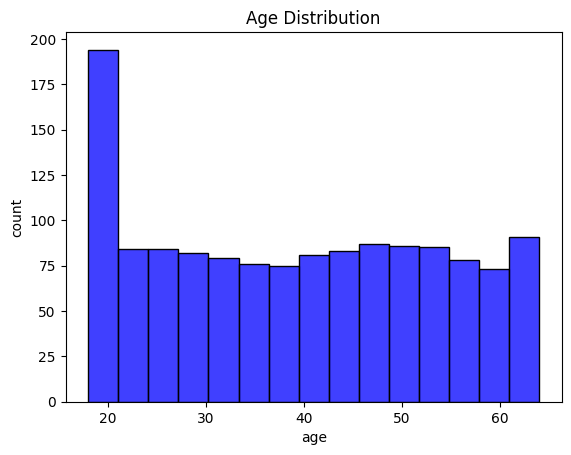

In [15]:
#checking the age bar
sns.histplot(df.age, bins=15, kde=False, color='blue')
plt.title('Age Distribution')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

This indicates that a larger proportion of the population consists of young adults, and we can also observe a comparable upward trend in the number of individuals belonging to age groups above 30 years.

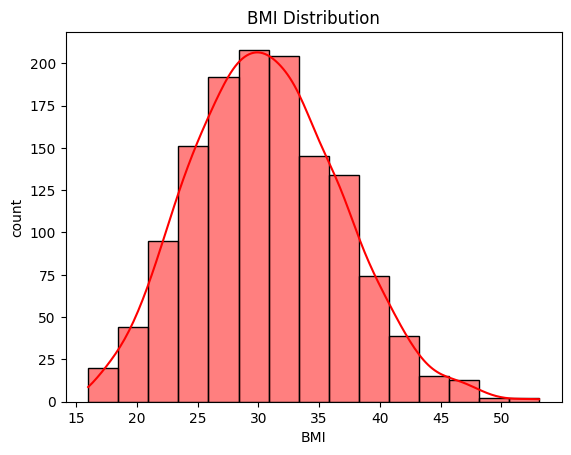

In [16]:
#bmi distribution plot
sns.histplot(df.bmi, bins=15, kde=True, color='red')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('count')
plt.show()

Most individuals have a BMI in the range of 25–40, which falls into the overweight or obese category and is generally considered unhealthy, potentially contributing to higher medical expenses.

Text(0.5, 1.0, 'Sex Distribution')

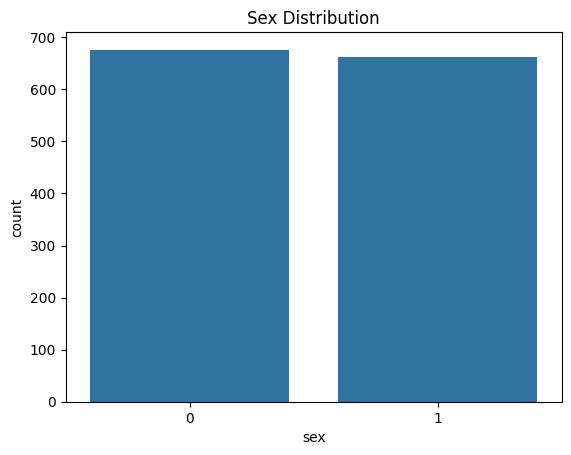

In [17]:
#sex distribution
sns.countplot(x = 'sex', data = df)
plt.title('Sex Distribution')

It is evident from the data that the representation of males and females is almost evenly balanced, indicating no significant gender-based disparity in the population distribution.

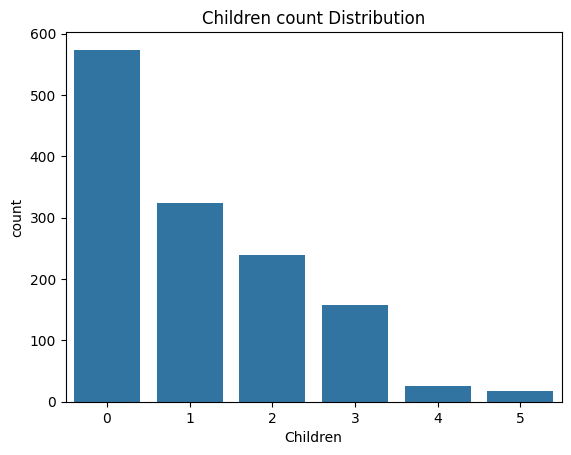

In [18]:
#Number of child countplot
sns.countplot(x = 'children', data = df)
plt.title('Children count Distribution')
plt.xlabel('Children')
plt.ylabel('count')
plt.show()

The data clearly shows that the majority of patients do not have any children, while a comparatively smaller portion of the population has between one and three children, indicating a skewed distribution toward childless individuals.

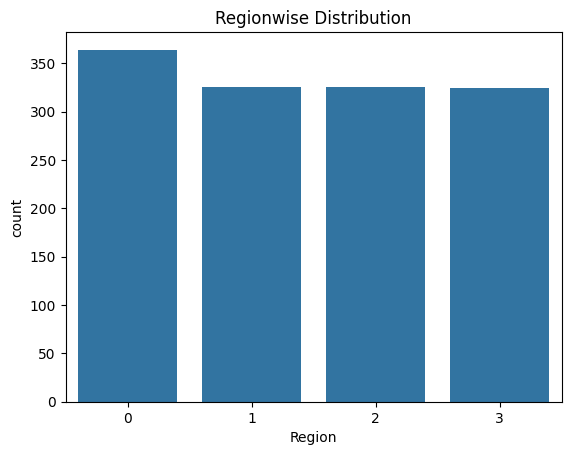

In [19]:
#plotting according to region
sns.countplot(x = 'region', data = df)
plt.title('Regionwise Distribution')
plt.xlabel('Region')
plt.ylabel('count')
plt.show()

The patients are distributed across all four regions, with representation in each area, although the Southeast region shows a slightly higher concentration compared to the others.

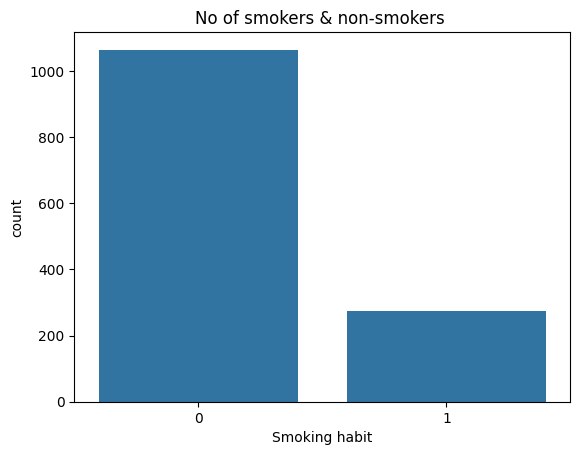

In [20]:
#count of smokers
sns.countplot(x = 'smoker', data = df)
plt.title('No of smokers & non-smokers ')
plt.xlabel('Smoking habit')
plt.ylabel('count')
plt.show()

Approximately 80% of the patients are non-smokers, indicating a strong majority, while only a small fraction of the population consists of individuals who smoke.

<Axes: xlabel='smoker', ylabel='count'>

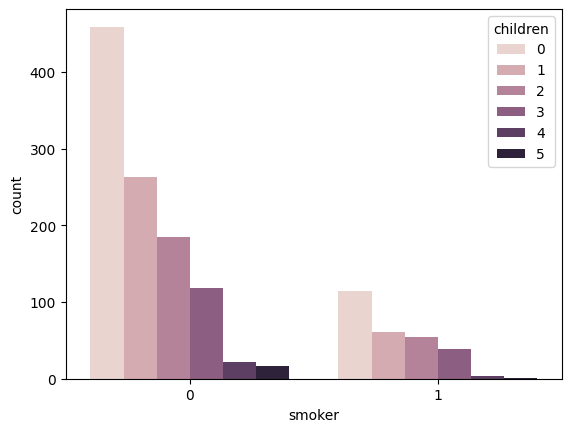

In [21]:
#smoker count with respect to children count
sns.countplot(x = df.smoker, hue = df.children)

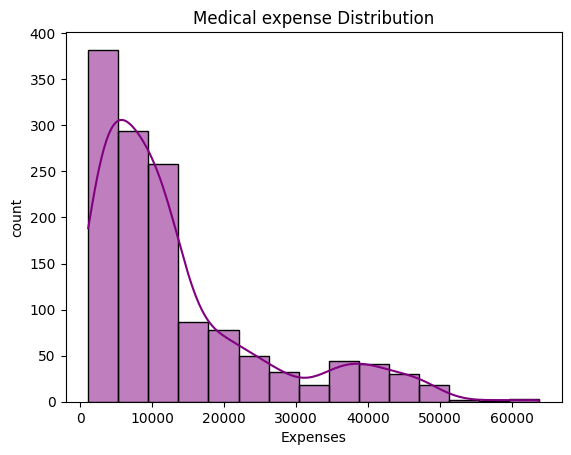

In [23]:
#Expense distribution
sns.histplot(df.expenses, bins=15, kde=True, color='purple')
plt.title('Medical expense Distribution')
plt.xlabel('Expenses')
plt.ylabel('count')
plt.show()

The data indicates that the majority of medical expenses fall below 20,000, forming a significant portion of the overall cost distribution, while only a very small and almost negligible number of patients incur expenses exceeding 50,000.

From the above plots, the dependence of medical expenses on each category has been thoroughly analyzed and the underlying trends have been examined. Based on these insights, a correlation map is now generated for further interpretation.

# **CORRELATION**

In [24]:
#creating correlation matrix
df.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,0.020856,0.109341,0.042469,-0.025019,0.006308,0.299008
sex,0.020856,1.000000,-0.046380,-0.017163,-0.076185,0.012816,-0.057292
bmi,0.109341,-0.046380,1.000000,0.012645,0.003968,-0.262750,0.198576
children,0.042469,-0.017163,0.012645,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,-0.076185,0.003968,0.007673,1.000000,-0.038873,0.787251
region,0.006308,0.012816,-0.262750,0.001205,-0.038873,1.000000,-0.039473
expenses,0.299008,-0.057292,0.198576,0.067998,0.787251,-0.039473,1.000000


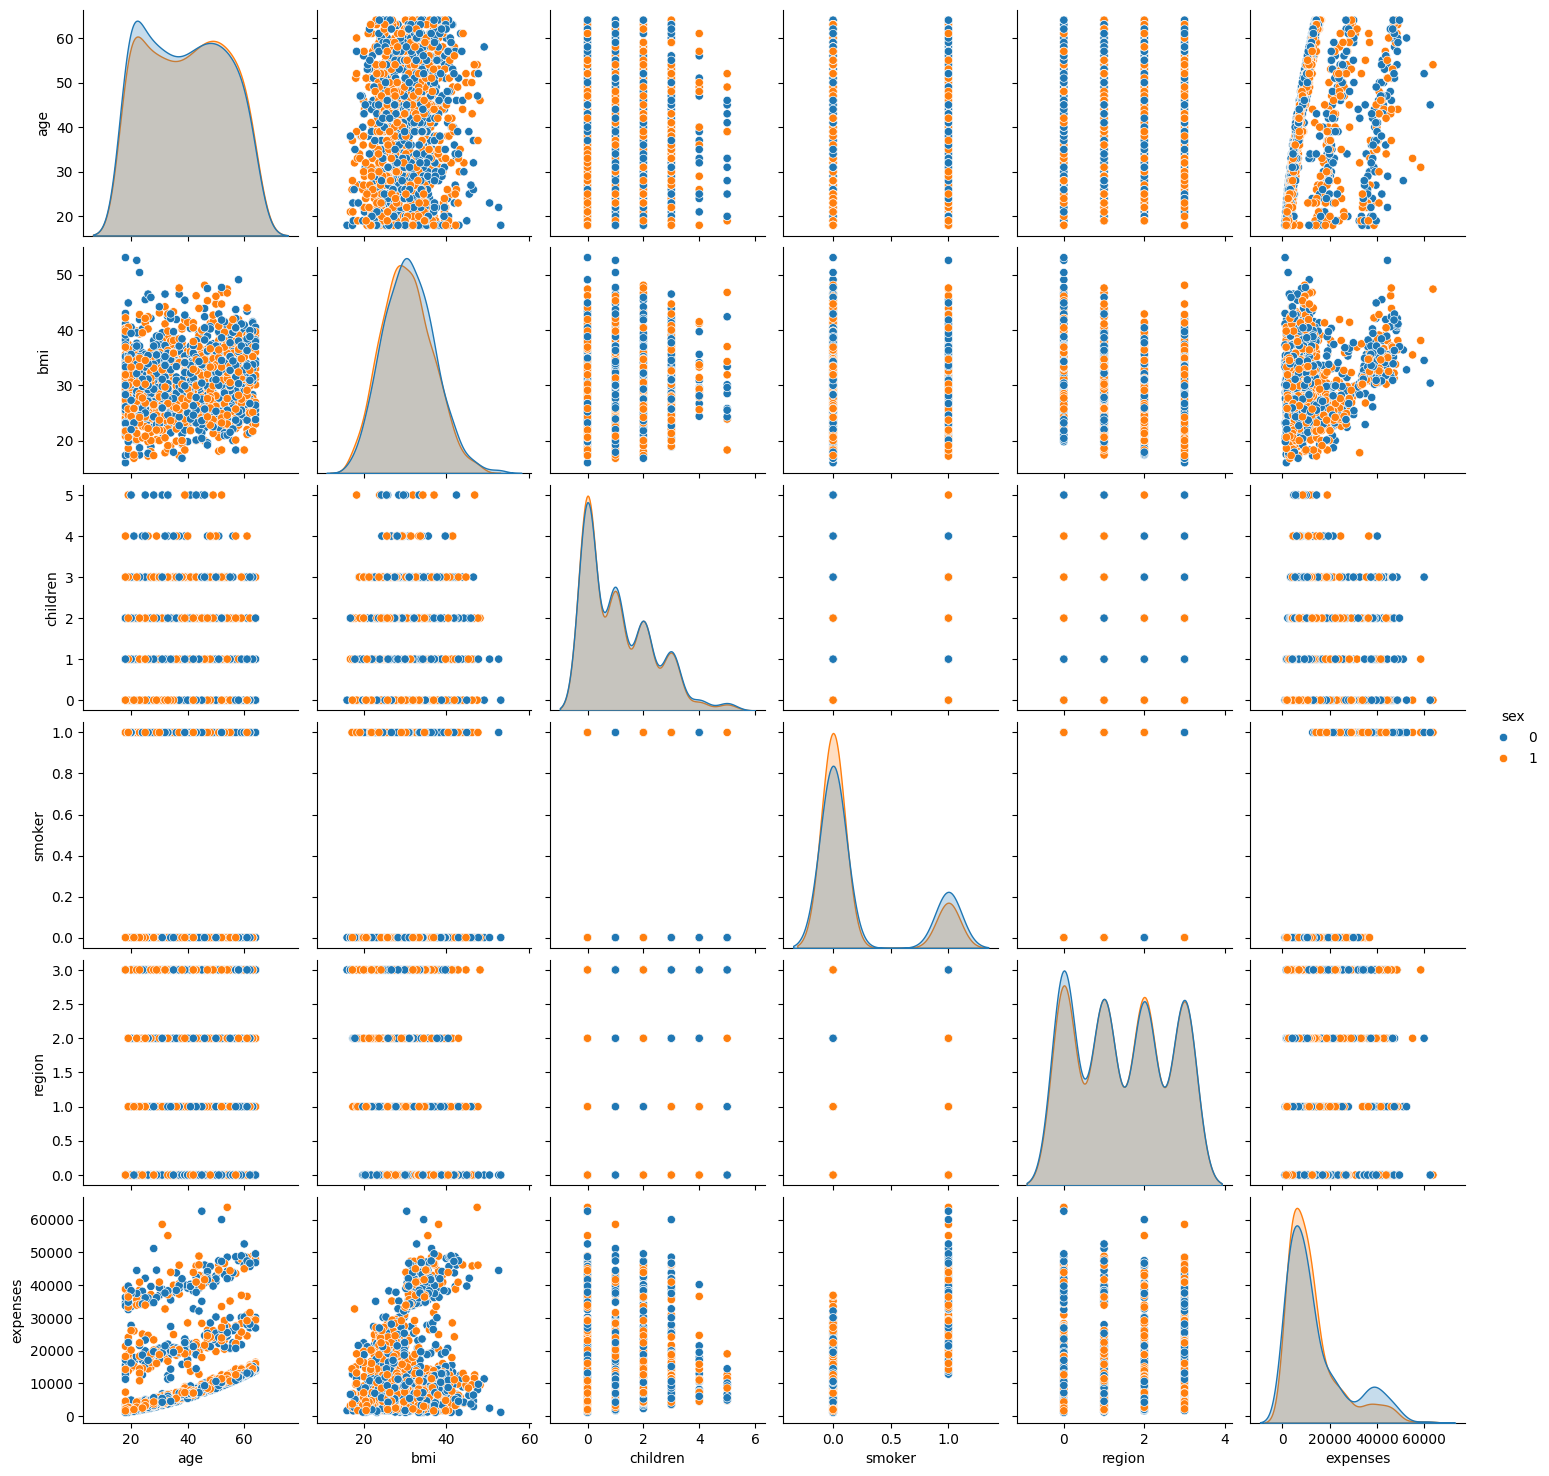

In [25]:
sns.pairplot(df,hue='sex')
plt.show()

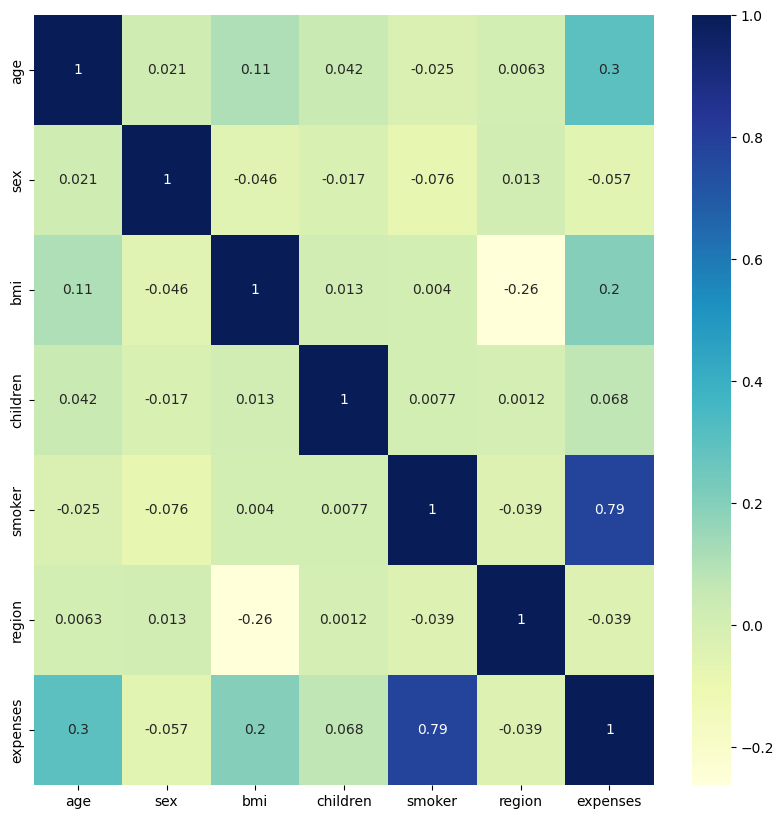

In [26]:
#plotting the correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

The heatmap indicates a strong correlation between medical expenses and smoking status. To gain deeper insights, we further examine patients’ smoking habits and their relationships with other contributing factors.

# **Plotting smoker count with gender of patients**

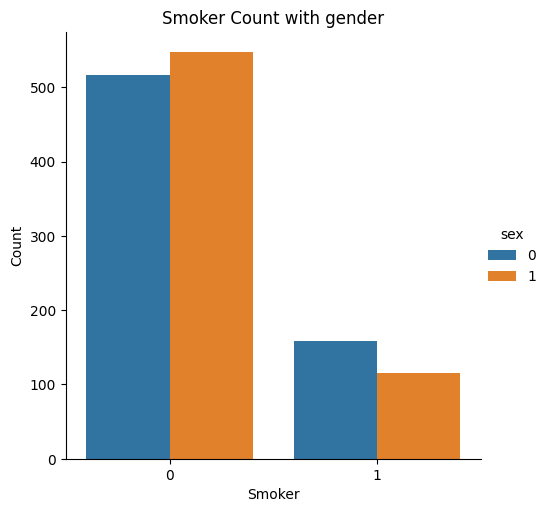

In [27]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=df)
plt.title('Smoker Count with gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()


We observe that the number of male smokers exceeds that of female smokers. Therefore, considering the influence of smoking on medical expenses, it can be inferred that the treatment costs for male patients may be comparatively higher than those for female patients.

<Axes: xlabel='sex', ylabel='expenses'>

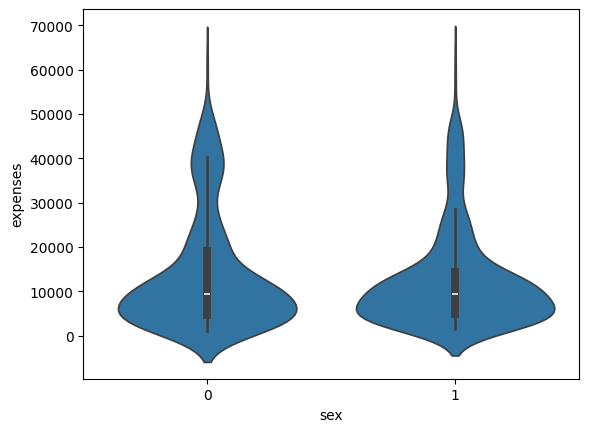

In [32]:
sns.violinplot(x = 'sex', y = 'expenses', data = df)

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='expenses', ylabel='smoker'>

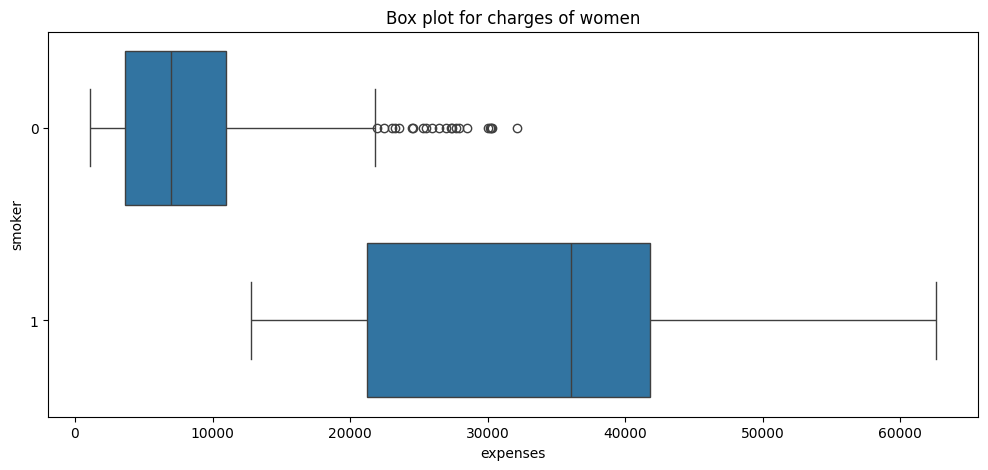

In [34]:
plt.figure(figsize=(12,5))
plt.title("Box plot for expenses of women")
sns.boxplot(y="smoker", x="expenses", data = df[(df.sex == 0)] , orient="h")

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='expenses', ylabel='smoker'>

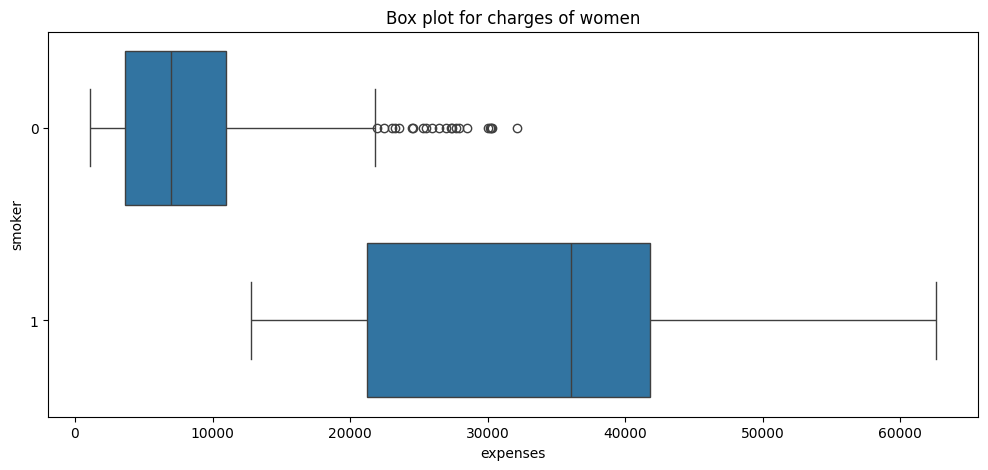

In [35]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="expenses", data = df[(df.sex == 0)] , orient="h")

The assumption holds true, as the medical expenses for male patients are indeed higher than those for female patients. Furthermore, the data confirms that smokers consistently incur greater medical expenses compared to non-smokers.

# Smoker vs Age

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


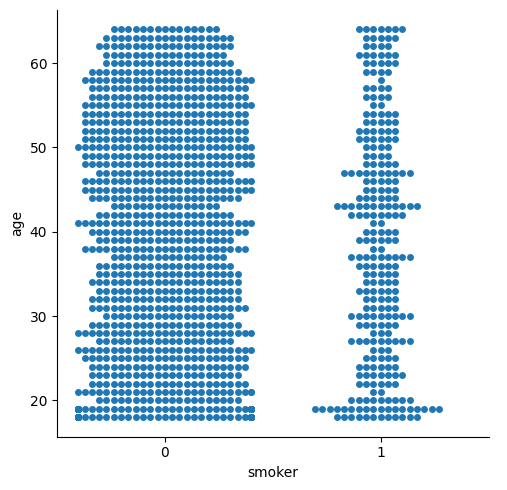

In [36]:
#smokers and age distribution
sns.catplot(x="smoker", y="age", kind="swarm", data=df)

From the graph, we can observe a notable number of smokers at age 19. Therefore, I will now focus on examining the medical expenses incurred by smokers within this age group.

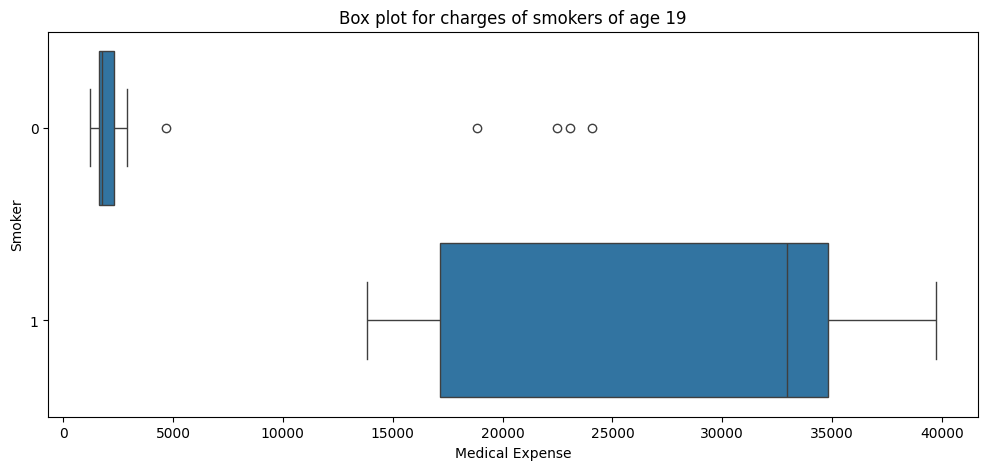

In [38]:
#smokers of age 19
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of smokers of age 19")
sns.boxplot(y="smoker", x="expenses", data = df[(df.age == 19)] , orient="h")
plt.xlabel('Medical Expense')
plt.ylabel('Smoker')
plt.show()

Interestingly, smokers at age 19 incur significantly higher medical expenses compared to their non-smoking peers, while the few outliers observed among non-smokers may be due to illness or accidental cases. Overall, the data clearly demonstrates that smokers consistently face higher medical costs than non-smokers. To further highlight this trend, the charge distribution will now be plotted with respect to patient age for both groups.

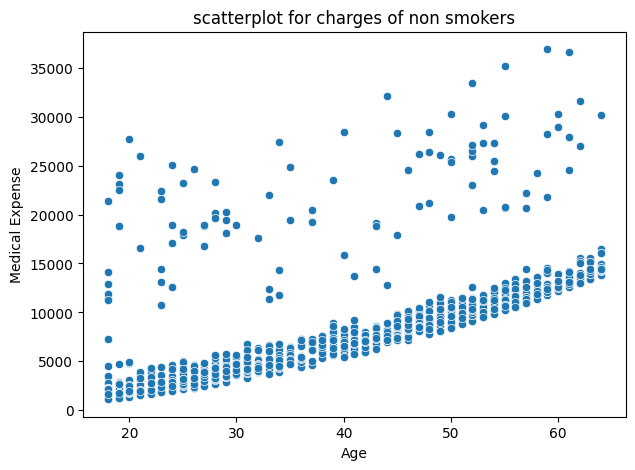

In [39]:

#non smokers charge distribution
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of non smokers")
sns.scatterplot(x="age", y="expenses", data = df[(df.smoker == 0)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

The majority of data points indicate that medical expenses tend to increase with age, likely due to the higher susceptibility of older individuals to illness. However, several outliers suggest that other factors, such as specific illnesses or accidents, may also contribute to elevated medical costs.

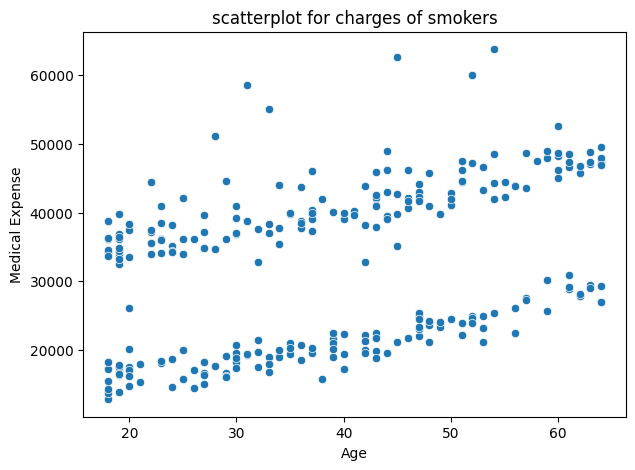

In [40]:
#smokers charge distribution
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of smokers")
sns.scatterplot(x="age", y="expenses", data = df[(df.smoker == 1)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

Here we see pecularity in the graph. In the graph there are two segments, one with high medical expense which may be due to smoking related illness and the other with low medical expense which may be due age related illness.


Now, in order to get a more clear picture, I will combine these two graphs

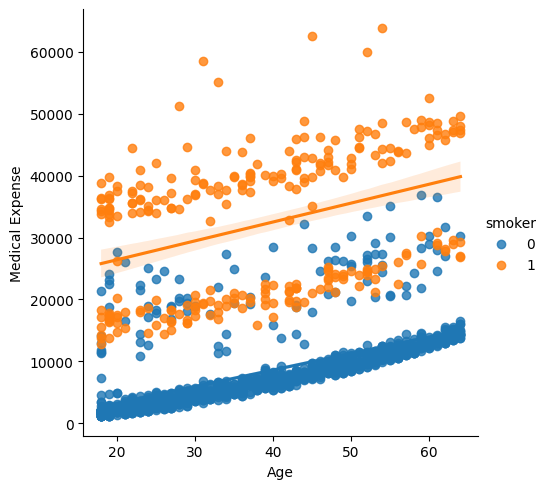

In [41]:
#age charges distribution
sns.lmplot(x="age", y="expenses", data = df, hue = 'smoker')
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()


Now, we clearly understand the variation in charges with respect to age and smoking habits. The medical expense of smokers is higher than that of non-smokers. In non-smokers, the cost of treatment increases with age which is obvious. But in smokers, the cost of treatment is high even for younger patients, which means the smoking patients are spending less upon their smoking related illness as well as age related illness.


# Charges distribution for obese patients (BMI > 30)

/tmp/ipython-input-4283967718.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.bmi >= 30)]['expenses'])


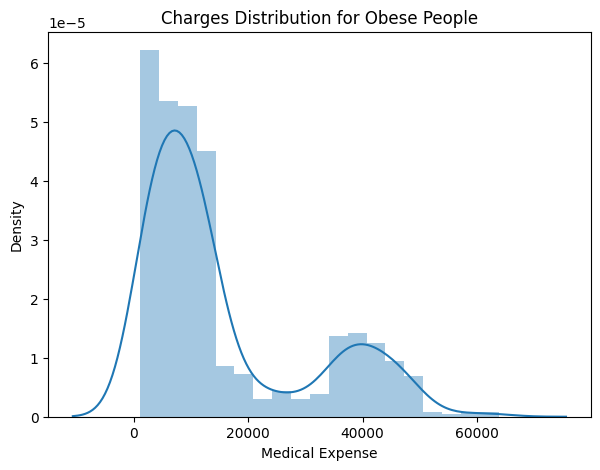

In [43]:
#bmi charges distribution for obese people
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi >= 30)]['expenses'])
plt.title('Charges Distribution for Obese People')
plt.xlabel('Medical Expense')
plt.show()

# Charges distribution for healthy patients (BMI < 30)

/tmp/ipython-input-2608310055.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.bmi < 30)]['expenses'])


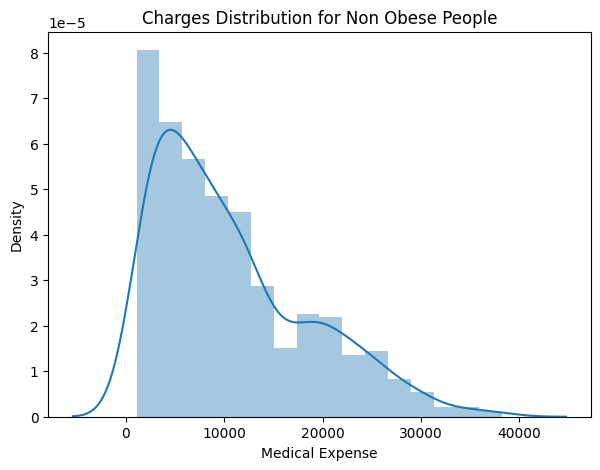

In [44]:
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi < 30)]['expenses'])
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical Expense')
plt.show()

Therefore, patients with BMI less than 30 are spending less on medical treatment than those with BMI greater than 30

**Through the Exploratory Data Analysis, we have a clear understanding about the data and the coorelation between the variables. Now, I will build a model to predict the medical expense of patients.**

We see that medical expense does not have much relation with region and number of children there these columns can be neglected

In [46]:
inputs=df.drop(['expenses','region','children'],axis=1)
inputs

,age,sex,bmi,smoker
0,19,1,27.9,1
1,18,0,33.8,0
2,28,0,33.0,0
3,33,0,22.7,0
4,32,0,28.9,0
...,...,...,...,...
1333,50,0,31.0,0
1334,18,1,31.9,0
1335,18,1,36.9,0
1336,21,1,25.8,0


In [49]:
output=df.expenses
output

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


# Train Test Split

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,output,test_size=0.3)

# MODEL BUILDING AND EVALUATION

# Linear Regression

/tmp/ipython-input-912130048.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='y',label='Actual Value')
/tmp/ipython-input-912130048.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lpred,hist=False,color='r',label='Predicted Value',ax=ax1)


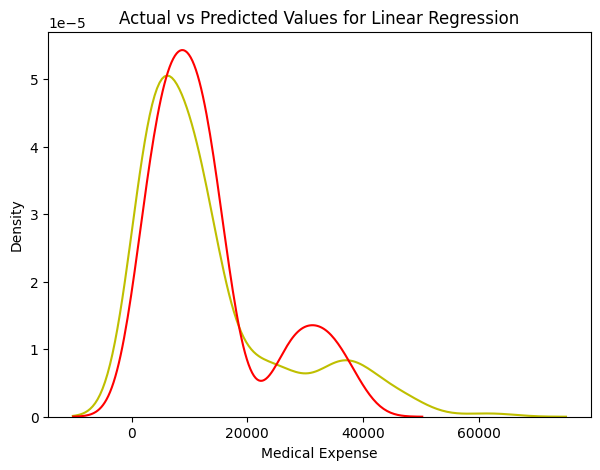

In [64]:
#distribution of actual and predicted values
plt.figure(figsize=(7,5))
ax1 = sns.distplot(y_test,hist=False,color='y',label='Actual Value')
sns.distplot(lpred,hist=False,color='r',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Medical Expense')
plt.show()

In [65]:
print('MAE:', mean_absolute_error(y_test, lpred))
print('MSE:', mean_squared_error(y_test, lpred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lpred)))
print('R2 Score:', r2_score(y_test, lpred))

MAE: 4372.534197729653
MSE: 38326971.44976688
RMSE: 6190.878083904325
R2 Score: 0.7531416249084087


# Decision Tree Regression

/tmp/ipython-input-1669924108.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="y", label="Actual Value")
/tmp/ipython-input-1669924108.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtpred, hist=False, color="r", label="Predicted Values" 

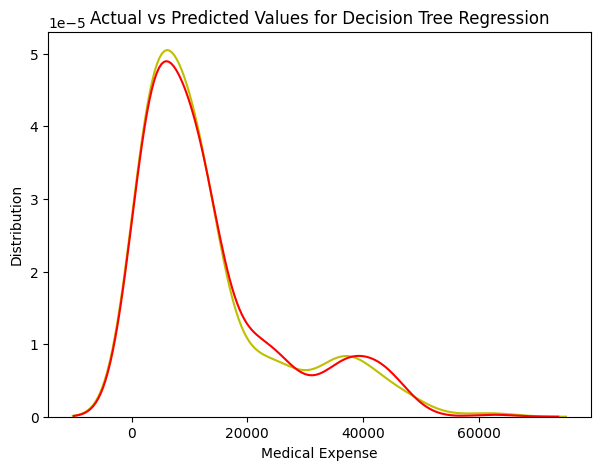

In [66]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="y", label="Actual Value")
sns.distplot(dtpred, hist=False, color="r", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicted Values for Decision Tree Regression')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()


In [67]:
print('MAE:', mean_absolute_error(y_test, dtpred))
print('MSE:', mean_squared_error(y_test, dtpred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtpred)))
print('Accuracy:', dt.score(x_test,y_test))

MAE: 3400.1548756218904
MSE: 47335998.599568665
RMSE: 6880.116176313352
Accuracy: 0.6951158086429385


# Random Forest Regression

/tmp/ipython-input-4177700216.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="y", label="Actual Value")
/tmp/ipython-input-4177700216.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfpred, hist=False, color="r", label="Predicted Values" 

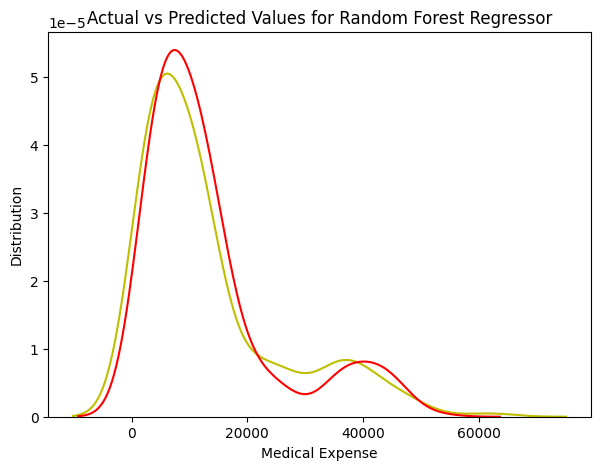

In [68]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="y", label="Actual Value")
sns.distplot(rfpred, hist=False, color="r", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicted Values for Random Forest Regressor')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [69]:
print('MAE:', mean_absolute_error(y_test, rfpred))
print('MSE:', mean_squared_error(y_test, rfpred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rfpred)))
print('Accuracy:', rf.score(x_test,y_test))

MAE: 2902.1363818455343
MSE: 30116804.63396768
RMSE: 5487.877971854666
Accuracy: 0.8060220994858338


# **CONCLUSION**

Based on the above models, both the Decision Tree Regressor and Random Forest Regressor demonstrate strong predictive performance; however, the Random Forest Regressor outperforms all models with the lowest RMSE value. Consequently, the Random Forest Regressor will be used to predict patients’ medical expenses. Furthermore, the analysis indicates that smokers incur higher medical costs than non-smokers, patients with a BMI above 30 (obese) have higher expenses compared to those with a BMI below 30 (healthy), and older patients generally face higher medical expenses than younger patients.

**Thus, based on the overall analysis, it can be concluded that patients’ medical expenses are influenced by factors such as age, BMI, and smoking habits.**


# **Additional Enhancements**
## Correlation Heatmap 

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()